In [54]:
#initialize packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [55]:
#change to directory
import os
os.chdir('C:\\Users\\trevo\\OneDrive - UNT System\\PhD\\Ta Actuator\\Sensors and Actuators A- Physical\\Data')
#open excel
flexheat = pd.read_excel('data_4_19_2023.xlsx',sheet_name="flexheat")
fan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="fan")
nofan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="nofan")



In [56]:
#take flexheat total height and subtract sample height
flexheat['elongation (mm)'] = flexheat['Total height'] - flexheat['sample height']
fan['elongation (mm)'] = fan['enlongation']
nofan['elongation (mm)'] = nofan['total height'] - nofan['sample height']

In [57]:
#rename the three dataframes columns so Time is time (s), elongation is elongation (mm), and temperature is temperature (C)
flexheat = flexheat.rename(columns={'time':'time (s)'})
fan = fan.rename(columns={'Time':'time (s)','temp':'temperature (C)'})
nofan = nofan.rename(columns={'Time':'time (s)','temp':'temperature (C)'})
#reorder the three dataframes so they are time, elongation, and temperature
flexheat = flexheat[['time (s)','elongation (mm)']]
fan = fan[['time (s)','elongation (mm)','temperature (C)']]
nofan = nofan[['time (s)','elongation (mm)','temperature (C)']]

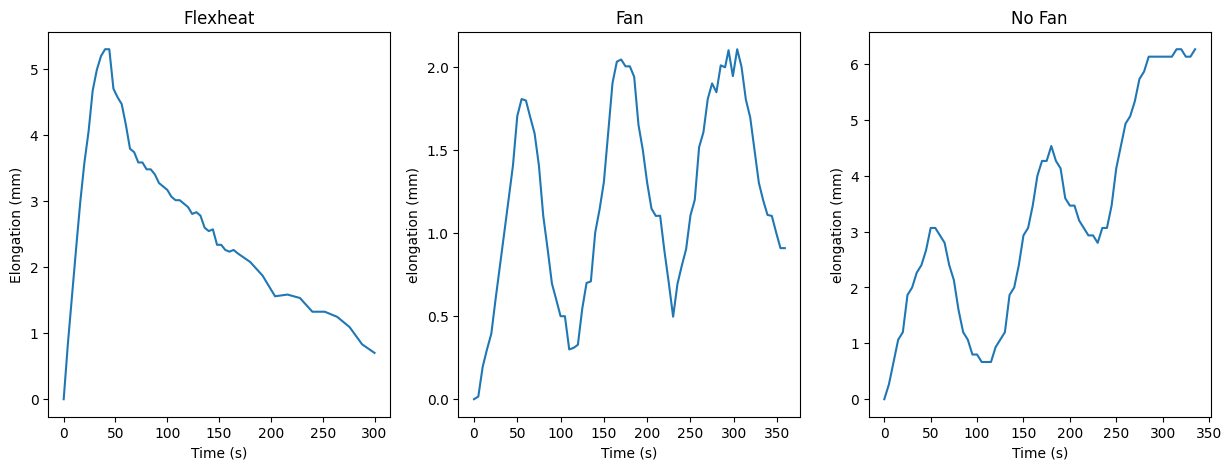

In [58]:
#plot the three dataframes
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.lineplot(x='time (s)',y='elongation (mm)',data=flexheat,ax=ax[0])
sns.lineplot(x='time (s)',y='elongation (mm)',data=fan,ax=ax[1])
sns.lineplot(x='time (s)',y='elongation (mm)',data=nofan,ax=ax[2])
ax[0].set_title('Flexheat')
ax[1].set_title('Fan')
ax[2].set_title('No Fan')
ax[0].set_ylabel('Elongation (mm)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
plt.show()

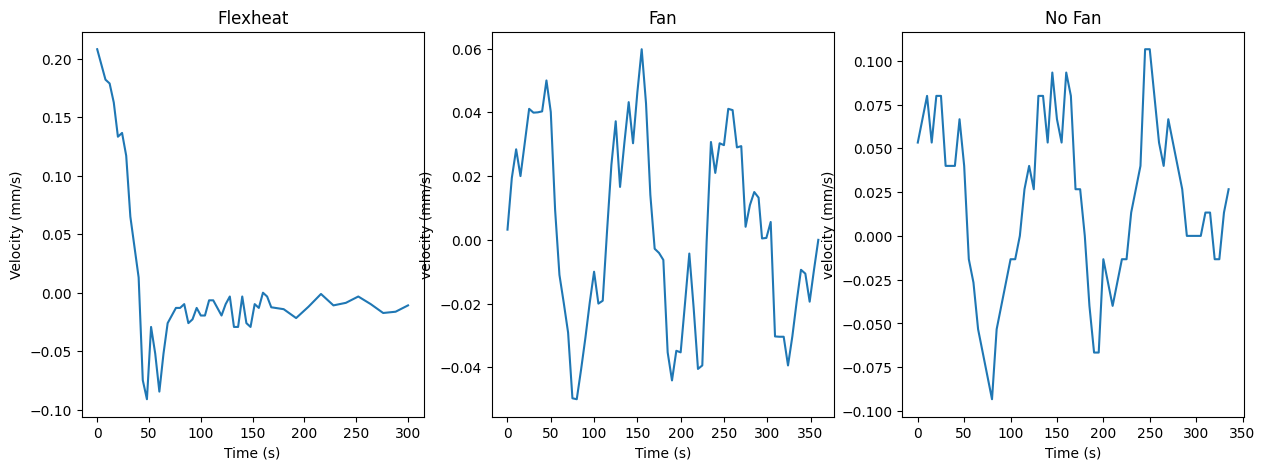

In [59]:
#take the derivative of the three graphs to get velocity in mm/s
flexheat['velocity (mm/s)'] = np.gradient(flexheat['elongation (mm)'],flexheat['time (s)'])
fan['velocity (mm/s)'] = np.gradient(fan['elongation (mm)'],fan['time (s)'])
nofan['velocity (mm/s)'] = np.gradient(nofan['elongation (mm)'],nofan['time (s)'])

#plot the three velocity graphs
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=flexheat,ax=ax[0])
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=fan,ax=ax[1])
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=nofan,ax=ax[2])
ax[0].set_title('Flexheat')
ax[1].set_title('Fan')
ax[2].set_title('No Fan')
ax[0].set_ylabel('Velocity (mm/s)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
plt.show()


In [60]:
#mass 
m = 9.53; #grams

#calculate mechanical power with P = Fv
F = m*9.81; #N
#print force
print('Force (N):',F)
flexheat['mechanical power (W)'] = F*flexheat['velocity (mm/s)']
fan['mechanical power (W)'] = F*fan['velocity (mm/s)']
nofan['mechanical power (W)'] = F*nofan['velocity (mm/s)']

Force (N): 93.4893


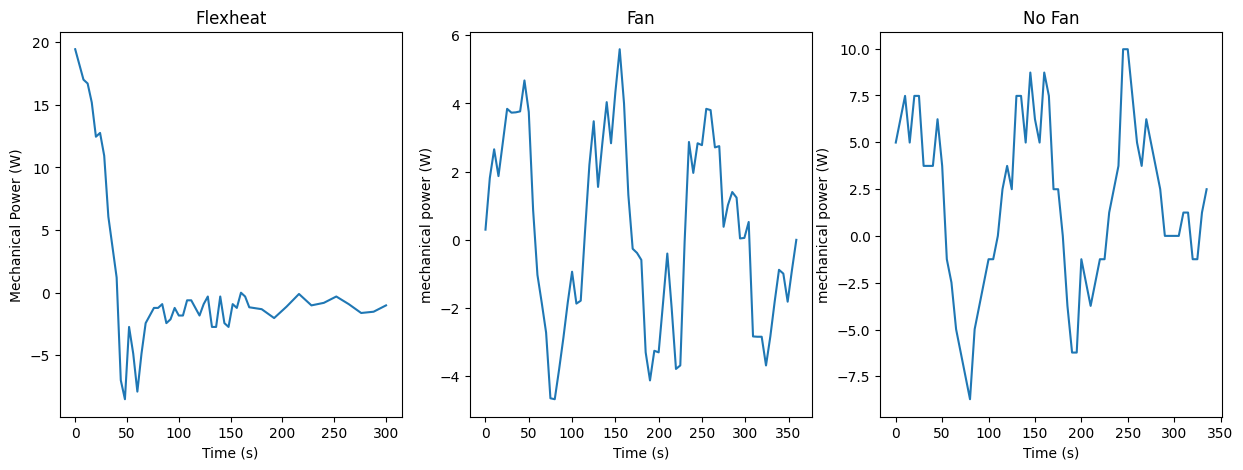

In [61]:
#plot the three mechanical power graphs
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.lineplot(x='time (s)',y='mechanical power (W)',data=flexheat,ax=ax[0])
sns.lineplot(x='time (s)',y='mechanical power (W)',data=fan,ax=ax[1])
sns.lineplot(x='time (s)',y='mechanical power (W)',data=nofan,ax=ax[2])
ax[0].set_title('Flexheat')
ax[1].set_title('Fan')
ax[2].set_title('No Fan')
ax[0].set_ylabel('Mechanical Power (W)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
plt.show()

In [62]:
#integrate the power to get energy for all three graphs
flexheat['energy (J)'] = np.trapz(flexheat['mechanical power (W)'],flexheat['time (s)'])
fan['energy (J)'] = np.trapz(fan['mechanical power (W)'],fan['time (s)'])
nofan['energy (J)'] = np.trapz(nofan['mechanical power (W)'],nofan['time (s)'])


In [63]:
#print the energy for all three graphs
print('Flexheat energy (J):',flexheat['energy (J)'].iloc[-1])
print('Fan energy (J):',fan['energy (J)'].iloc[-1])
print('No Fan energy (J):',nofan['energy (J)'].iloc[-1])

Flexheat energy (J): 64.81924800000012
Fan energy (J): 89.05323271500012
No Fan energy (J): 585.5256600697677


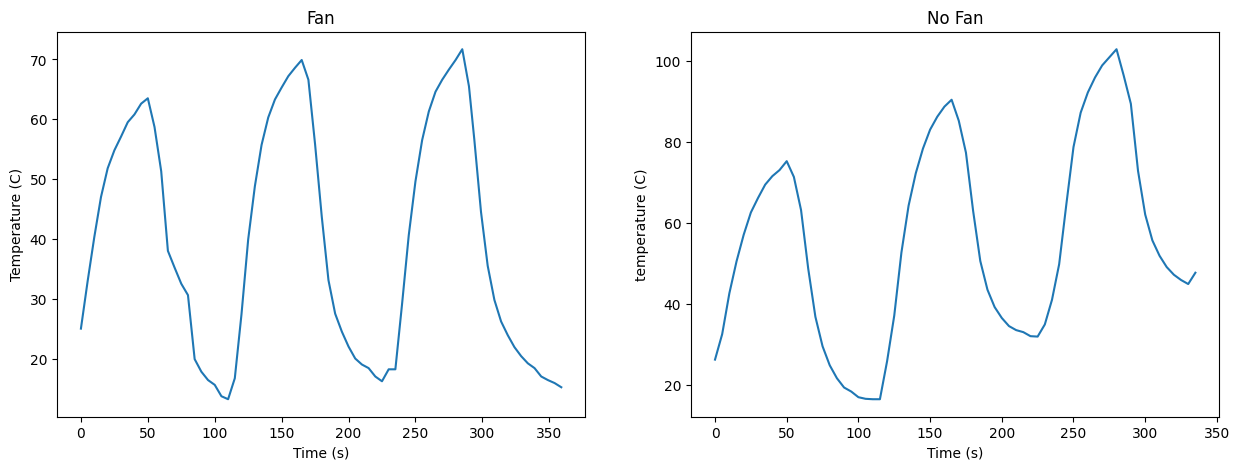

In [64]:
#plot temperatures for fan and nofan
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='time (s)',y='temperature (C)',data=fan,ax=ax[0])
sns.lineplot(x='time (s)',y='temperature (C)',data=nofan,ax=ax[1])
ax[0].set_title('Fan')
ax[1].set_title('No Fan')
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
plt.show()